<a href="https://colab.research.google.com/github/dayoungkimm/MS-AI-School/blob/main/DL_03_Keras01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
keras.__version__

'2.12.0'

In [ ]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

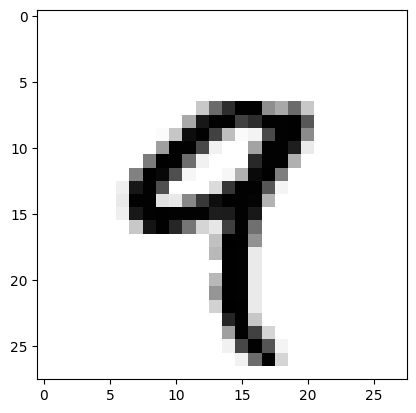

In [ ]:
# 데이터의 확인 
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)

In [ ]:
# 신경망을 만드는 부분 

from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# 데이터를 준비하는 부분

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [ ]:
# 라벨 데이터를 카테고리 데이터로 변환
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# 신경망의 학습
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 13ms/step - loss: 0.2614 - accuracy: 0.9240
Epoch 2/5
469/469 [==============================] - 7s 15ms/step - loss: 0.1063 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 8s 16ms/step - loss: 0.0691 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0505 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0379 - accuracy: 0.9881


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test acc:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0677 - accuracy: 0.9789
test acc: 0.9789000153541565


In [ ]:
# IMDB

from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

In [ ]:
train_data.shape

(25000,)

In [ ]:
train_labels[0:5]

array([1, 0, 0, 1, 0])

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
# 데이터를 준비
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  result = np.zeros((len(sequences),dimension))

  print(result.shape)

  for i, sequence in enumerate(sequences):
    result[i, sequence] = 1
  return result

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

(25000, 10000)
(25000, 10000)


In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
# 라벨 데이터도 실수형으로 
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
y_train[0]

1.0

In [ ]:
# 신경망 제작
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    #epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 3s 92ms/step - loss: 0.5611 - accuracy: 0.7855 - val_loss: 0.4468 - val_accuracy: 0.8589
Epoch 2/4
30/30 [==============================] - 2s 56ms/step - loss: 0.3756 - accuracy: 0.8853 - val_loss: 0.3558 - val_accuracy: 0.8697
Epoch 3/4
30/30 [==============================] - 2s 57ms/step - loss: 0.2856 - accuracy: 0.9073 - val_loss: 0.3048 - val_accuracy: 0.8847
Epoch 4/4
30/30 [==============================] - 1s 46ms/step - loss: 0.2318 - accuracy: 0.9241 - val_loss: 0.3051 - val_accuracy: 0.8760


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

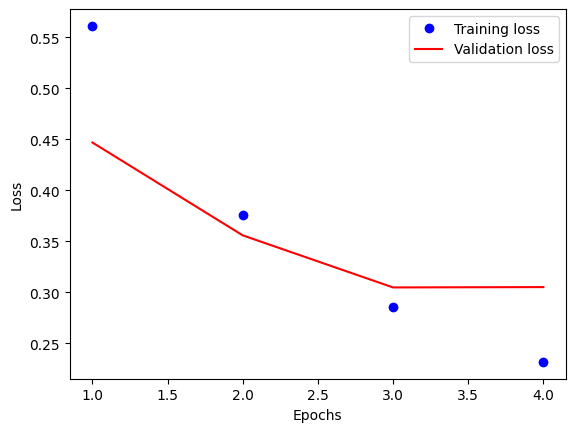

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

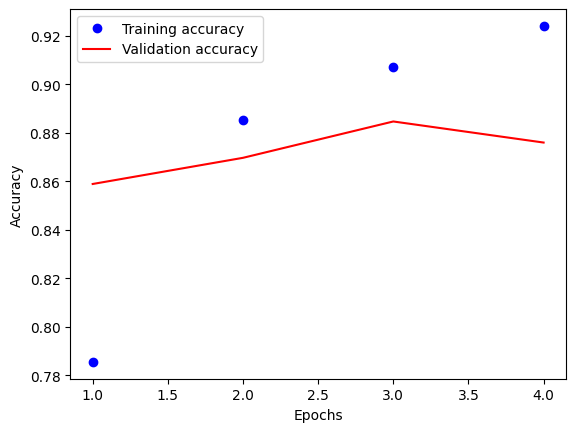

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.34762752],
       [0.9962502 ],
       [0.96336585],
       ...,
       [0.1379886 ],
       [0.30788413],
       [0.681022  ]], dtype=float32)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('loss={0}, accuracy={1}'.format(test_loss, test_acc))

782/782 [==============================] - 3s 4ms/step - loss: 0.3140 - accuracy: 0.8728
loss=0.3139511048793793, accuracy=0.8728399872779846
